In [1]:
#general purpose packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data processing
import re, string
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


stop_words = stopwords.words()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel

#metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix


C:\Users\Korisnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
reviews = pd.read_csv('data/imdb.csv')

In [3]:
reviews.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
reviews['review'].iloc[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [5]:
reviews['target'] = reviews['sentiment'].apply(lambda s: 1 if s == 'positive' else 0)

In [6]:
reviews.head()

,review,sentiment,target
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [7]:
#clean unnecessary simbols, cases, etc.
def prepare_review(review):
    clean_review = re.sub('<.+?>', ' ', review)
    clean_review = re.sub('\s+', ' ', clean_review)
    return clean_review.lower()

In [8]:
reviews['prepared_review'] = reviews['review'].apply(lambda r: prepare_review(r))

In [9]:
reviews.head()

,review,sentiment,target,prepared_review
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"petter mattei's ""love in the time of money"" is..."


In [10]:
reviews['prepared_review'].iloc[1]

'a wonderful little production. the filming technique is very unassuming- very old-time-bbc fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. the actors are extremely well chosen- michael sheen not only "has got all the polari" but he has all the voices down pat too! you can truly see the seamless editing guided by the references to williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. a masterful production about one of the great master\'s of comedy and his life. the realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. it plays on our knowledge and our senses, particularly with the scenes concerning orton and halliwell and the sets (particularly of their flat with halliwell\'s murals decorating every surface) are terribly well done.'

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   review           50000 non-null  object
 1   sentiment        50000 non-null  object
 2   target           50000 non-null  int64 
 3   prepared_review  50000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [12]:
reviews.shape

(50000, 4)

In [13]:
reviews.drop_duplicates()

,review,sentiment,target,prepared_review
0,One of the other reviewers has mentioned that ...,positive,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,0,basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"petter mattei's ""love in the time of money"" is..."
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1,i thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0,"bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...,negative,0,i am a catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,0,i'm going to have to disagree with the previou...


In [14]:
reviews.shape

(50000, 4)

In [15]:
reviews = reviews[['prepared_review', 'target']]

In [16]:
reviews

,prepared_review,target
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1
...,...,...
49995,i thought this movie did a down right good job...,1
49996,"bad plot, bad dialogue, bad acting, idiotic di...",0
49997,i am a catholic taught in parochial elementary...,0
49998,i'm going to have to disagree with the previou...,0


In [17]:
reviews['target'].value_counts() # => balansiran dataset

target
1    25000
0    25000
Name: count, dtype: int64

<Axes: >

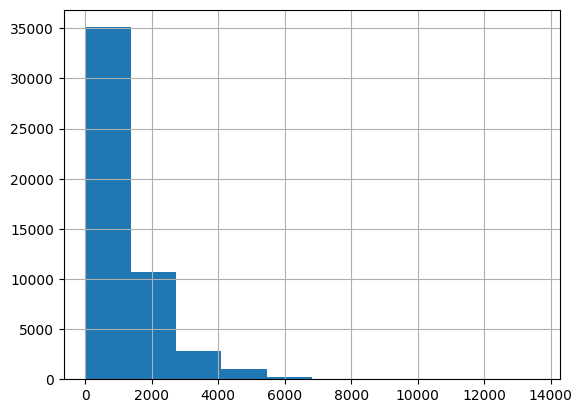

In [18]:
reviews['prepared_review'].str.len().hist()

Text(0.5, 1.0, 'Negative Reviews')

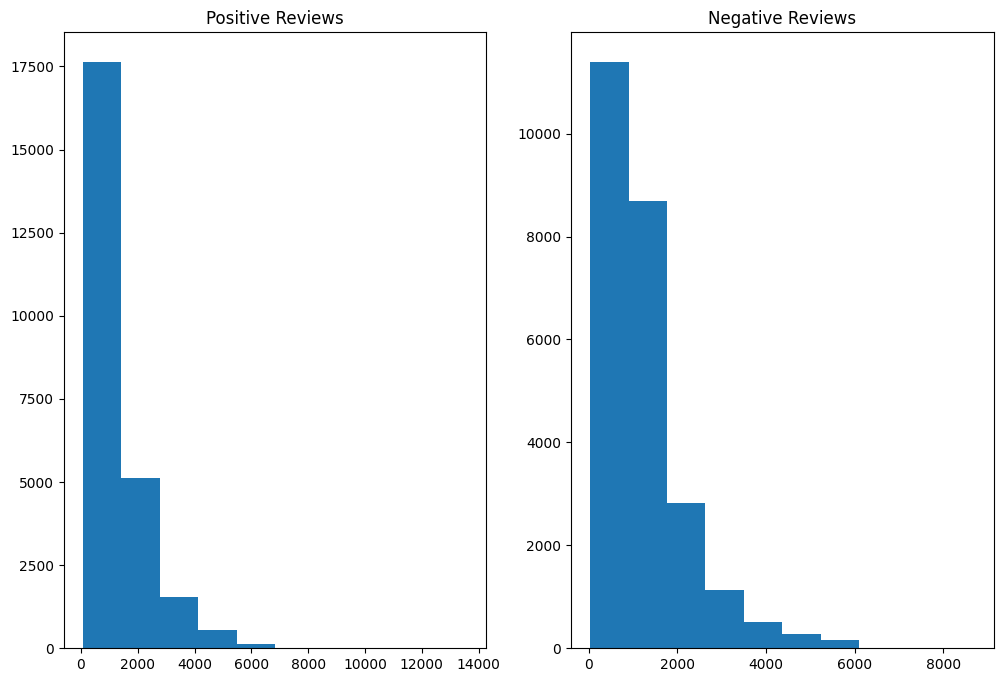

In [19]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(reviews[reviews['target'] == 1]['prepared_review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(reviews[reviews['target'] == 0]['prepared_review'].str.len())
ax2.set_title( 'Negative Reviews')

In [20]:
#preprocessing

reviews.rename(columns={'prepared_review':'text', 'target':'sentiment'}, inplace = True)

In [21]:
reviews.head()

,text,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [22]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Korisnik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Korisnik\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Korisnik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# converting to lowercase, removing URL links, special characters, punctuations...

def clean_text(text):
    abbreviations = {
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'t": " not",
        "'ve": " have",
        "'m": " am"
    }

    text = text.lower()

    text = re.sub('https?://\S+|www\.\S+', '', text) # removing URL links

    text = re.sub(r"\b\d+\b", "", text) # removing number 

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    text = re.sub('<.*?>+', '', text) # removing special characters

    for abbr, full_form in abbreviations.items():
        text = re.sub(abbr, full_form, text)

    text = re.sub(f"[{string.punctuation}]", "", text)

    words = word_tokenize(text)

    cleaned_text = " ".join([word for word in words if word.isalpha()]) #removes numbers and symbols and joins the words back into a single string.

    return cleaned_text
    

In [24]:
print(reviews.shape)
reviews.head()

(50000, 2)


,text,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [25]:
df = reviews['text'].apply(clean_text)
df

0        one reviewers mentioned watching oz episode ho...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically there is family little boy jake thin...
4        petter mattei is love time money visually stun...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    i am going disagree previous comment side malt...
49999    one expects star trek movies high art fans exp...
Name: text, Length: 50000, dtype: object

In [26]:
#proveri
word_lem = WordNetLemmatizer()
df = df.apply(word_lem.lemmatize)
df

0        one reviewers mentioned watching oz episode ho...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically there is family little boy jake thin...
4        petter mattei is love time money visually stun...
                               ...                        
49995    thought movie right good job creative original...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    i am going disagree previous comment side malt...
49999    one expects star trek movies high art fans exp...
Name: text, Length: 50000, dtype: object

In [27]:
#CHECK IF SENTIMENT NOT CHANGED

reviews['sentiment'].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [28]:
df = pd.DataFrame(df)
df['sentiment'] = reviews['sentiment']
df

,text,sentiment
0,one reviewers mentioned watching oz episode ho...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
3,basically there is family little boy jake thin...,0
4,petter mattei is love time money visually stun...,1
...,...,...
49995,thought movie right good job creative original...,1
49996,bad plot bad dialogue bad acting idiotic direc...,0
49997,catholic taught parochial elementary schools n...,0
49998,i am going disagree previous comment side malt...,0


In [29]:
#tokenizacija
tokenized_review = df['text'].apply(lambda x: x.split())
tokenized_review.head(5)

0    [one, reviewers, mentioned, watching, oz, epis...
1    [wonderful, little, production, filming, techn...
2    [thought, wonderful, way, spend, time, hot, su...
3    [basically, there, is, family, little, boy, ja...
4    [petter, mattei, is, love, time, money, visual...
Name: text, dtype: object

In [30]:
tokenized_review.iloc[5]

['probably',
 'alltime',
 'favorite',
 'movie',
 'story',
 'selflessness',
 'sacrifice',
 'dedication',
 'noble',
 'cause',
 'preachy',
 'boring',
 'never',
 'gets',
 'old',
 'despite',
 'seen',
 'times',
 'last',
 'years',
 'paul',
 'lukas',
 'performance',
 'brings',
 'tears',
 'eyes',
 'bette',
 'davis',
 'one',
 'truly',
 'sympathetic',
 'roles',
 'delight',
 'kids',
 'are',
 'grandma',
 'says',
 'like',
 'dressedup',
 'midgets',
 'children',
 'makes',
 'fun',
 'watch',
 'mother',
 'is',
 'slow',
 'awakening',
 'what',
 'is',
 'happening',
 'world',
 'roof',
 'believable',
 'startling',
 'dozen',
 'thumbs',
 'they',
 'would',
 'up',
 'movie']

In [31]:
#ne mora ovako ja msm
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize) #nema digrama ili trigrama
text_counts = cv.fit_transform(df['text'])

C:\Users\Korisnik\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [32]:
#train test split

X = text_counts
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Complement NB model

CNB = ComplementNB()
CNB.fit(X_train, y_train)

predicted = CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('ComplementNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

ComplementNB model accuracy is 86.08%
------------------------------------------------
Confusion Matrix:
      0     1
0  4348   613
1   779  4260
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4961
           1       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [34]:
#Multinomial NB model
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)

print('MultinominalNB model accuracy is',str('{:04.2f}'.format(accuracy_score*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

MultinominalNB model accuracy is 86.08%
------------------------------------------------
Confusion Matrix:
      0     1
0  4348   613
1   779  4260
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      4961
           1       0.87      0.85      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [35]:
#Bernouli NB model
BNB = BernoulliNB()
BNB.fit(X_train, y_train)

predicted = BNB.predict(X_test)
accuracy_score_bnb = metrics.accuracy_score(predicted,y_test)

print('BernoulliNB model accuracy = ' + str('{:4.2f}'.format(accuracy_score_bnb*100))+'%')
print('------------------------------------------------')
print('Confusion Matrix:')
print(pd.DataFrame(confusion_matrix(y_test, predicted)))
print('------------------------------------------------')
print('Classification Report:')
print(classification_report(y_test, predicted))

BernoulliNB model accuracy = 84.94%
------------------------------------------------
Confusion Matrix:
      0     1
0  4389   572
1   934  4105
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4961
           1       0.88      0.81      0.84      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

